<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>


# Introduction to the Pandas library

The [official documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) of Pandas is the starting point for learning the library. In particular you can consult the page [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) which is an introduction to the library.

This introduction is written so that you can use pandas with little knowledge of python. We remind you that to execute a cell of a jupyter notebook, you have to execute the keys control or shift or command + enter. Most of the cells are already filled. Some are left empty so that you can make your own tests throughout this notebook. It is strongly recommended that you consult the documentation for all the functions used: either online in the Pandas documentation or by placing a question mark in place of the brackets, the documentation will then be displayed in the notebook.

## Chapter 1: Creating the table

This first chapter shows how to create a pandas table or read it from a file (excel, csv, ods), add rows and columns and perform operations on these rows and columns.

### Outline

* [1. Create a Series or a DataFrame](#1-Create-a-Series-or-a-DataFrame.)
    * [1.1 Lists and dictionaries](#1.1-Lists-and-dictionaries)
    * [1.2 Series](#1.2-Series)
    * [1.3 Arrays or DataFrames](#1.3-Arrays-or-DataFrames)
* [2. Manipulating rows and columns](#2.-Manipulating-rows-and-columns)
    * [2.1 Accessing a single value](#2.1-accessing-a-single-value)
    * [2.2 Accessing a column](#2.2-Accessing-a-Column)
    * [2.3 Accessing the index](#2.3-Accessing-the-index)
    * [2.4 Accessing a row or subpart of an array](#2.4-Accessing-a-row-or-subpart-of-an-array)
    * [2.5 Delete rows or columns](#2.5-Delete-rows-or-columns)
    * [2.6 Using slices (intervals)](#2.6-Using-slices-(intervals))
    * [2.7 Insert a column](#2.7-Insert-a-column)
    * [2.8 Insert a line](#2.8-Insert-a-line)
* [3. Import data from a file](#3-Import-data-from-a-file)
---

First of all, it is necessary to import some libraries and in particular the `pandas` library. We also import the `numpy` library (Numerical Python). Here is the usual way to import these two libraries, giving them shorter names (alias, shortcuts), for convenience, `pd` for `pandas` and `np` for `numpy`.

In [ ]:
import numpy as np
import pandas as pd

## 1 Create a `Series` or a `DataFrame`.

The `Series` and `DataFrame` are the basic objects of pandas. They are built from lists or dictionaries. The name of the lines of these objects is called the `index`. 

### 1.1 Lists and dictionaries

In Python, a list is a set of elements, enclosed in square brackets, separated by commas.

In [ ]:
une_liste = [1, 2, 3, 4]
une_liste

If necessary, you can mix the type of elements that you put in a list.

In [ ]:
une_liste = [1, 4.3, "a", 5, "bonjour"]
une_liste

A dictionary is a set of `(key, value)` pairs. Each pair is written `key: value`, they are separated by commas and the whole is enclosed in braces. For example, the dictionary below contains 3 entries. The keys are `1`, `"key"` and `18`. The associated values are `"a"`, `3.34` and `126` :

```py
{1: "a", "key": 3.34, 18: 126}
```

Below, we use strings as keys, so we write them in quotes. Then we use lists of numbers as values. We can use this type of dictionary to create an array with pandas. The keys of the dictionary will become the name of the columns, the lists (the values of the dictionary) the values in the columns.

In [ ]:
un_dico = {"a": [1, 2, 3, 4], "b": [2, 3, 4, 5]}
un_dico

### 1.2 `Series`

Series are one-dimensional arrays, they have only one column and an index (the name of the rows). By default the index is the row number.

You can create a series from a list:

In [ ]:
pd.Series(["a", "b", "c", "d"])

You can give a name to the series and also specify the index:

In [ ]:
pd.Series([2, 4, 6, 8], index=["deux", "quatre", "six", "huit"], name="pair")

Afterwards, it will be possible to create an array, a `DataFrame` by combining several `Series`. The name of the series will be the name of the column of the array and the index of the series will be the name of the rows (the index of the `DataFrame`).

The raw values of a `Series` are accessible via the `values` attribute.

In [ ]:
s = pd.Series([1., 1.1, 1.2, 1.3, 1.4])
s.values

### 1.3 Arrays or `DataFrame`

The `DataFrame` are the pandas arrays. As for the series, the index is the name of the rows of the array. We will start by creating the `DataFrame` by hand. In practice, we rather create a `DataFrame` by reading data in a file or on a server.

To create our first `DataFrame` we will use the following dictionary:

```py
{
    "col1": [1, 2, 3, 4],
    "col2": ["a", "b", "c", "d"],
    "col3": [1.1, 1.2, 1.3, 1.4]
}
```

The keys of the dictionary will be the names of the columns of the table. The values of the dictionary will be the contents of the table.

We also give the index of the `DataFrame`, that is to say the name of the rows. Try to see what the default index is if we don't give it.

In [ ]:
pd.DataFrame({
    "col1": [1, 2, 3, 4],
    "col2": ["a", "b", "c", "d"],
    "col3": [1.1, 1.2, 1.3, 1.4]},
    index=["ligne1", "ligne2", "ligne3", "ligne4"]
)

In [ ]:
pd.DataFrame({
    "col1": [1, 2, 3, 4],
    "col2": ["a", "b", "c", "d"],
    "col3": [1.1, 1.2, 1.3, 1.4]},
)

Typically, we store the array in a variable named `df` (for `DataFrame`). We can then display the array or act on it or perform operations.

In [ ]:
df = pd.DataFrame({
    "col1": [1, 2, 3, 4],
    "col2": ["a", "b", "c", "d"],
    "col3": [1.1, 1.2, 1.3, 1.4]},
    index=["ligne1", "ligne2", "ligne3", "ligne4"]
)

In [ ]:
df

An interesting information is to know the type of data contained in each column of the table. Here is how to do it:

In [ ]:
df.dtypes

The `col1` column contains integers, the `col2` column contains `objects` (strings) the `col3` column contains floating numbers.

<div class="alert alert-info">

**Note:** In Python the `.` allows you to take an action or get information about what precedes it. The syntax `df.dtypes` reads: "Give me the types of df?". What is to the right of the dot acts or is contained in what is to the left of the dot. This syntax will be used often. In order to go further into this point, you need to learn some notions on oriented object programming in python.
</div>

Here is another example to calculate some statistical quantities on columns containing numbers:

In [ ]:
df.describe()

If your `DataFrame` has many rows, the `head()` and `tail()` methods allow you to display the first or last rows of the array.

```py
df.head()
df.tail()
```

<div class="alert alert-success">

It's time to create your own `DataFrame`, it's your turn!
</div>

The raw values of the columns of a `DataFrame` are accessible via the `values` attribute.

In [ ]:
df.values

The `values` attribute returns a numpy array `numpy.ndarray`. These are the basic arrays of `numpy` and can be manipulated or used with all functions available in this library.

## 2. Manipulating rows and columns

We will now see how to manipulate rows and columns or access an array value.

Let's create an array from random integers. For this we use a dictionary whose keys are `col_i`, the name of the columns. The syntax is a bit advanced but it allows to quickly create an artificial array. As index, we simply choose the letters of the alphabet.

In [ ]:
df = pd.DataFrame(
    {f"col_{k}": np.random.randint(20, size=10) for k in range(4)},
    index=list("abcdefghij")
)
df

With pandas, there are two ways to access the elements of the array:
* From row and column names (e.g. row `e` and column `col_2`).
* From row and column indices (e.g. row 3 and column 2).

<div class="alert alert-warning">

**Important:** In python, all indices start at 0. So the value on the first row and column corresponds to indices `0, 0`.
</div>

### 2.1 accessing a single value

Here are the ways to access a single value:
* By using names: `df.at[row_name, column_name]`
* By using subscripts: `df.iat[i, j]`

In [ ]:
df.at["e", "col_2"]

In [ ]:
# 3th row, 2de column --> indices start at 0
df.iat[2, 1]

<div class="alert alert-success">
Practice extracting a value from the array with both methods.
</div>

### 2.2 Accessing a Column

Here are four equivalent ways to access the third column whose name is `col_2`.

In [ ]:
# note: this method works only if the column's names ar "simple"
# (no space nor special character)
df.col_2

In [ ]:
df["col_2"]

In [ ]:
df.loc[:, "col_2"]
# hier the : means "all the lines" 

In [ ]:
df.iloc[:, 2]
# here the : means "all the lines"

Each column of a `DataFrame` is actually a `Series`:

In [ ]:
type(df.col_2)

### 2.3 Accessing the index

The index is a special column since it is actually the name of the rows. Here are some operations to give a name to the index, to extract the contents of the index or to transform the index into a column. First of all, we simply access the index in the following way:

In [ ]:
df.index

You can give it a name:

In [ ]:
df.index.name = "lettres"
df

Finally, we can transform the index into a standard column with the `reset_index()` method. A new index is created which is simply the row number.

In [ ]:
df.reset_index()

### 2.4 Accessing a row or subpart of an array

The generic way to retrieve a subpart of a `DataFrame` is to use `loc` (if using row and column names) or `iloc` (if using indices). The syntax is

```py
df.loc[rows, columns]
```

If the columns are not specified, by default they are all taken into account. To select all the rows you must specify `:`. For example:

```py
df.loc[:, columns]
```

Here is the third line:

In [ ]:
df.loc["c"]

In [ ]:
# 3rd line, thus i=2
df.iloc[2]

Here is the entire `"col_2"` column.

In [ ]:
df.loc[:, "col_2"]

In [ ]:
# in this case, it would be simple to do like this
df["col_2"]

To extract more than one row or column we write the list of row or column names (or indices).

<div class="alert alert-info">
    
**Reminder:** in python lists are written in square brackets
</div>

You will notice that it is not mandatory to put them in sequence. It is possible to use this strategy to reorder an array.

In [ ]:
lines = ["c", "f", "a"]
columns = ["col_3", "col_0"]
df.loc[lines, columns]

Or more directly:

In [ ]:
df.loc[["c", "f", "a"], ["col_3", "col_0"]]

With indices, we proceed in the same way but using `iloc` :

In [ ]:
df.iloc[[2, 5, 0], [3, 0]]

<div class="alert alert-info">

**Note:** It may be interesting to extract a single column and store it in a `DataFrame` instead of a `Series`. To do this, we use the same syntax as if we wanted to extract several columns, passing a list of columns but this list contains only one element.
</div>

In [ ]:
df[["col_3"]]

<div class="alert alert-success">

**Exercise:** Display the subarray containing rows d, b and e and columns 1 and 3. Use `loc` and `iloc`.
</div>

The extraction of a sub-table, in practice, can be used to create a new table by deleting (selecting) some rows or columns.

In [ ]:
new_df = df.iloc[[2, 5, 0], [3, 0]]
new_df

### 2.5 Delete rows or columns

To delete rows or columns from a `DataFrame` we use the `drop()` method. 

<div class="alert alert-success">

Display documentation for the `drop()` method.
</div>

In [ ]:
df.drop?

To delete columns use :

```py
df.drop(columns="col_O")
df.drop(columns=["col_1", "col_2"])
```

To delete rows, we will do the same way, specifying that it is the index:

```py
df.drop(index="b")
df.drop(index=["a", "b", "d"])
```

<div class="alert alert-info">

Note the `inplace` parameter to the `drop()` method. This parameter is present in many `pandas` operations and can take the value `True` or `False`.
    
* `inplace=True` will change the `DataFrame`.
* `inplace=False`, usually the default value, will return a new array without changing the original one.
    
This parameter is used to secure operations to avoid losing data.
</div>

In [ ]:
df.drop(index=["a", "b"])

In [ ]:
df.drop(columns="col_1")

### 2.6 Using `slices` (intervals)

Let's start with a new table:

In [ ]:
df = pd.DataFrame(
    {f"col_{k}": np.random.randint(20, size=10) for k in range(4)},
    index=list("abcdefghij")
)
df

The syntax consists in indicating the starting point, the ending point (included) and the step, separated by `:`. For example here is how to select the lines from `"b"` to `"d"` included.

In [ ]:
df.loc["b":"d"]

The general syntax is as follows 

    start: end: step

By default, if the start is absent, the interval starts at the beginning. If the end is absent, the interval ends at the end. The default step is 1.

Here is how to go from the beginning to `"c"'. 

In [ ]:
df.loc[:"c"]

From `"f"` to the end

In [ ]:
df.loc["f":]

From `"b"` to `"h"` by step of 2

In [ ]:
df.loc["b":"h":2]

The same is true for columns. We can therefore combine the two 

In [ ]:
df.loc["b":"d", :"col_1"]

<div class="alert alert-info">
    
**Note:** Here the selection of rows or columns has nothing to do with alphabetical order. When we write `"b": "d"` we mean that we want the rows from the one called `"b"` to the one called `"d"`. Between the two there may be many lines with any name.
</div>

<div class="alert alert-success">

**Exercice :** Select rows a, d, g and j and columns 0 and 3.
    
Practice selecting different parts of the table.
</div>

<div class="alert alert-info">

**Tip:** If a negative step is used (-1 for example) the rows or columns are walked in the opposite direction.
</div>

In [ ]:
df.loc["d":"a":-1, :"col_1"]

You can use it to reverse the order of the rows of the array with the syntax `::-1`. Here neither the beginning nor the end are indicated so we go from the beginning to the end by steps of -1, so in reverse order.

In [ ]:
df.loc[::-1]

### 2.7 Inserting a column

#### 2.7.1 From other columns

It is possible to create a column by duplicating an existing column or by performing an operation on the columns in the table, as follows:

In [ ]:
df["new_column"] = df["col_0"]
df

In [ ]:
df["new_column"] = df["col_0"] - df["col_2"]
df

Or even

In [ ]:
df["new_column"] = (3 * df.col_0 - 2 * df.col_3) / (df.col_0 + df.col_3) 
df

All functions of `numpy` can be applied on the columns of a pandas array. For example:

In [ ]:
df["new_column"] = 38 * np.cos(2 * df.col_0) * np.exp(-df.col_1 / 3)
df

<div class="alert alert-info">
    
**Note:** To be more precise and less ambiguous the following syntax, in which `df.loc` is used, is to be preferred although it is less practical. Indeed, this syntax explicitly indicates that we work on columns and not rows.
</div>

In [ ]:
df.loc[:, "new_column"] = df.loc[:, "col_0"] - df.loc[:, "col_2"]
df

#### 2.7.2 From a list or a `Series`

If you have a list of values, or a `Series` you can add it to the table. 

In [ ]:
df["new_column"] = [0, 1, 2, 3, 4, 5, 6, 8, 9, 10]
df

To add a `Series` it must have the same index as the DataFrame. This way pandas knows which value to add to which row of the array.

In [ ]:
s = pd.Series([0, 1, 2, 3, 4, 5, 6, 8, 9, 10], index=list("abcdefghij"))
df["new_column"] = s
df

Here is an example where the index is not given in the same order and some values are missing. You can check that pandas has used the index and not the order in which the values are given. Moreover, the lines for which the values were missing are replaced by `NaN` which means *Not a Number*.

In [ ]:
s = pd.Series([0, 1, 2, 3, 4, 5, 6, 8, ], index=list("ajbichdg"))
df["new_column"] = s
df

#### 2.7.3 Rearrange columns

By using the two methods above, the new column is added afterwards. It is possible to rearrange the columns by giving the order in which they should be displayed.

First of all, here is the way to display the names of the columns in a table:

In [ ]:
df.columns

Now, let's rearrange the columns in the order that suits us:

In [ ]:
df[["col_0", "new_column", "col_1", "col_2", "col_3"]]

#### 2.7.4 Using the `insert()` method

The `insert()` method inserts a column at a given location in the array.

In [ ]:
# let's recreate a fresh random table
df = pd.DataFrame(
    {f"col_{k}": np.random.randint(20, size=10) for k in range(4)},
    index=list("abcdefghij")
)

In [ ]:
df.insert?

In [ ]:
df.insert(loc=1, column="new_column", value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
df

### 2.8 Insert a line

#### 2.8.1 From lists or other rows

To insert a row, we proceed exactly the same way as for columns. This time, however, it is mandatory to use the `df.loc` syntax.

In [ ]:
df = pd.DataFrame(
    {f"col_{k}": np.random.randint(20, size=10) for k in range(4)},
    index=list("abcdefghij")
)

From a list, whose number of elements is equal to the number of columns.

In [ ]:
df.loc["new_line"] = [1, 2, 3, 4]
df

Using other rows in the table:

In [ ]:
df.loc["new_line"] = 3 * df.loc["j"] - np.log(df.loc["a"])
df

#### 2.8.2 Using `Series` or dictionaries

Using `Series` or dictionaries, it is possible to add rows based on the column names. The column names are the dictionary keys or the index of the `Series`. If a value is not given for each column, the value `NaN` is automatically assigned.

In [ ]:
df.loc["new_line"] = pd.Series([1, 4], index=["col_0", "col_2"])
df

In [ ]:
df.loc["x"] = {"col_0": 3.4, "col_2": 33}
df

#### 2.8.3 The `append()` method

The `append()` method allows to add a `DataFrame` after another one.

In [ ]:
df.append?

In [ ]:
df1 = pd.DataFrame(
    {f"col_{k}": np.random.randint(20, size=5) for k in range(4)},
    index=list("abcde")
)
df1

In [ ]:
df2 = pd.DataFrame(
    {f"col_{k}": np.random.randint(20, size=5) for k in range(4)},
    index=list("abcde")
)
df2

In [ ]:
df1.append(df2)

In [ ]:
df1.append(df2, ignore_index=True)

## 3 Import data from a file

It is possible to create a `DataFrame` from an excel, csv, json, sql, stata file ... In the cell below, write `pd.read_` then press the tab key several times. A set of functions that read `pd.read_XXX` is displayed in a drop-down menu. Choose a method by pressing enter or by clicking on it and add a question mark to see how it works.

In [ ]:
pd.read_

In [ ]:
pd.read_csv?

In [ ]:
pd.read_excel?

The functions `read_csv()` or `read_excel()` have many arguments (parameters) allowing them to read excel or csv files in a flexible way.

In particular, the following parameters are important:
* `filepath_or_buffer` : the name, the path or a url to the file to read
* `sep` : the character used to separate columns in the file, usually `","`, `";"` or a space (see `delim_whitespace` in this case).
* `index_col` : the number of the column to use as an index
* `decimal` : indicates the character used for decimal numbers. By default it is a ., but if the file was created by a spreadsheet in French, the decimal numbers can be written with a vigule. You must then specify `decimal=","`.
* `usecols` : the column numbers to read
* `encoding` : specify the encoding of the file. The most common are ``utf-8`` or ``latin1`` (under windows).

In the case of reading an excel file, `sheet_name` allows you to select the sheet of the spreadsheet to read, by indicating its name or number.

Take the time to read the documentation for these functions to appreciate the possibilities they offer.

Here are the first lines of the file [`nike_data.csv`](https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/nike_data.csv).

    Number;Age;Usage;Gender;Awareness;Attitude;Preference;Intention;Loyalty
    1;18;3;2;7;6;5;5;6
    2;19;1;1;2;2;4;6;5
    3;20;1;1;3;3;6;7;6
    4;21;3;2;6;5;5;3;2
    5;22;3;2;5;4;7;4;3

Below is an example of how to read this file. In the example below, it is in the `data/` folder.

In [ ]:
df = pd.read_csv("data/nike_data.csv", sep=";", index_col=0, encoding="latin1")
df.head()

As a reminder, `head()` allows to display only the first 5 rows of the table. This allows to have an overview.

Here is how to read this file directly from its location on the internet. Depending on the site where the file is hosted, it may be sufficient to use the url directly as the file name. Here we use the `requests` and `io` modules to read the file.

In [ ]:
import requests
import io

In [ ]:
url = "https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/nike_data.csv"
download = requests.get(url).content

df = pd.read_csv(
    io.StringIO(download.decode('latin1')), 
    sep=";", 
    index_col=0,
    # sélection de colonnes
    usecols=(0, 1, 2, 3, 6)
)
df.head()

Here is an example of how to read the excel file [`ronfle.xls`](https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/ronfle.xls).

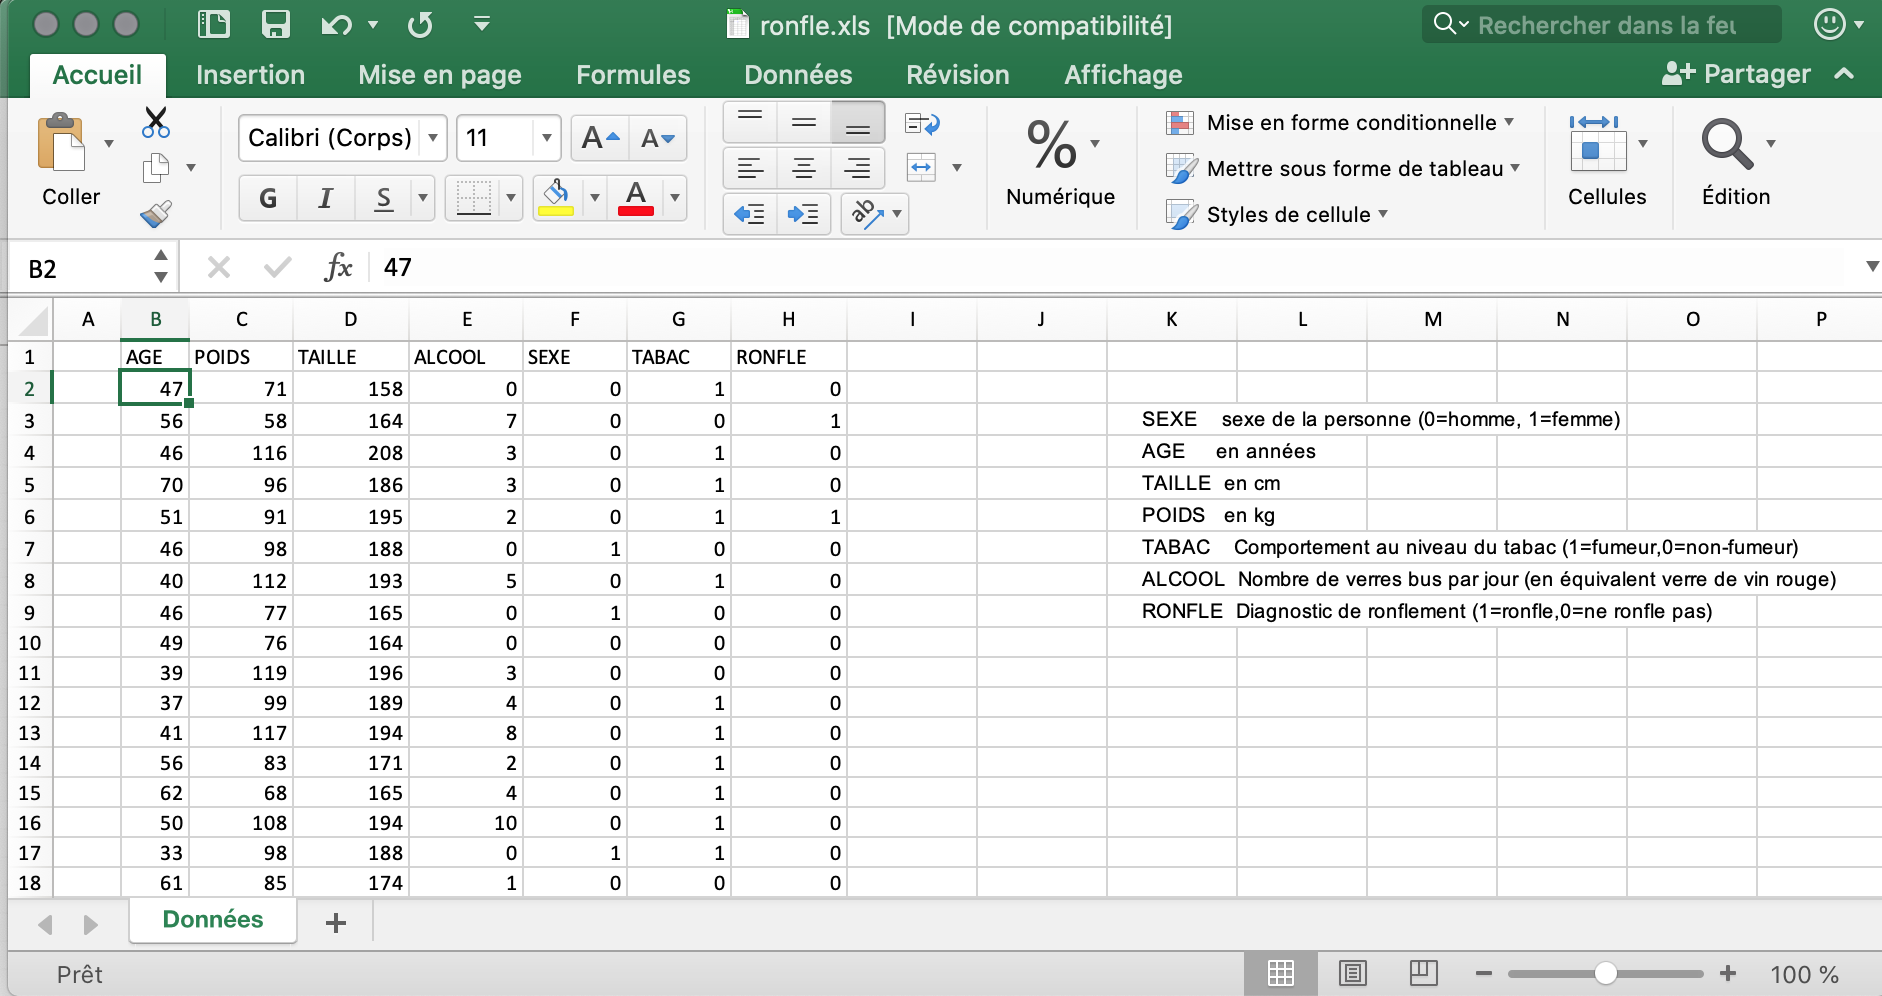

To read the file, note the following points found in the function parameters:
* the name of the file and its location `"data/ronfle.xls"`
* the column numbers to be used: from B to H, i.e. the numbers from 1 to 7 (the numbers start at 0).
* the name of the sheet, `"Data"`. Optional here because there is only one sheet.
* No column is specified for the index, so it will only be the row number.

In [ ]:
df = pd.read_excel(
    "data/ronfle.xls", 
    sheet_name="Données",
    usecols=(1, 2, 3, 4, 5, 6, 7)
)
df.head()

Here is a final example of a file in which the first few lines contain miscellaneous information and the columns of data are separated by tabs. The tab character is `"\t"`. This is the file [`"C_1s.TXT"`](https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/C_1s.TXT).

    \\Stockage.univ-pau.fr\aqturin\jhab32-30-min-5%-02.06.2015.dset.vms
    C 1s-1/24
        Characteristic Energy eV	1486.69	Acquisition Time s	3.6
    KE_C 1s-1/24	BE_C 1s-1/24	CPS_C 1s-1/24	C 1s_1_C 1s-1/24	C 1s_2_C 1s-1/24	C 1s_3_C 1s-1/24	Background_C 1s-1/24	Envelope_C 1s-1/24
    1191.87	294.824	165.278	165.278	165.278	165.278	165.278	165.278
    1191.97	294.724	167.222	167.222	167.222	167.222	167.222	167.222
    1192.07	294.624	161.389	161.389	161.389	161.389	161.389	161.389
    1192.17	294.524	171.944	171.944	171.944	171.944	171.944	171.944
    1192.27	294.424	162.778	162.778	162.778	162.778	162.778	162.778
    1192.37	294.324	167.222	167.222	167.222	167.222	167.222	167.222

In [ ]:
df = pd.read_csv(
    "data/C_1s.TXT", 
    sep="\t",
    skiprows=3,
    index_col=0
)
df.head()

In [ ]:
url = "https://gitlab.com/gvallverdu/cours-python/-/raw/master/notebooks/pandas/preparation/data/C_1s.TXT"
download = requests.get(url).content

df = pd.read_csv(
    io.StringIO(download.decode('utf-8')), 
    sep="\t",
    skiprows=3,
    usecols=(0, 1, 2, 7)
)
df.head()

<div class="alert alert-info">

**Note:** The default behavior of the [`pd.read_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html) function is similar to the case above where the separator is a tab.
</div>